<center><h2>D214 - Task 2 - Data Analytics Report and Executive Summary</h2>
Jonathon "Jon" Fryman <br>
Data Analytics 01/01/2022<br>
Student ID 00974544<br>
Program Mentor: Lea Yoakem<br>
C: 419-206-6989<br>
jfryma1@wgu.edu</center>

<center><h2>Research Question</h2></center>

<h3>A.  Summarize the original real-data research question you identified in task 1. Your summary should include justification for the research question you identified in task 1, a description of the context in which the research question exists, and a discussion of your hypothesis.</h3>

<center><h4>Original Research Question</h4></center>

To what extent can a company’s future daily per-share closing stock dollar value be accurately forecast?

<center><h4>Research Question Justification</h4></center>

The justification for the outlined research question is as follows

<center><h4>Description of Context for Research Question</h4></center>

The context for the outlined research question is as follows

<center><h4>Hypothesis Discussion</h4></center>

The hypothesis of this research project is that the performance of a specific subset of 14 tech companies market performance can be accurately forcast by training on historical performance and validating the accuracy of the forecast by generating a forecast and comparing to a subset of the historical dataset aside for validation.

<center><h2>Data Collection</h2></center>

<h3>B.  Report on your data-collection process by describing the relevant data you collected, discussing one advantage and one disadvantage of the data-gathering methodology you used, and discussing how you overcame any challenges you encountered during the process of collecting your data.</h3>

The data used to further analysis the previously proposed research question is publicly available at https://www.kaggle.com/datasets/evangower/big-tech-stock-prices. 

The full dataset consists of 14 unique csv files. Each file is associated with a specific tech companies stock performance for trading days beginning in 2010. The comanies included for analysis are:
<ul>
    <li>Adobe</li>
    <li>Amazon</li>
    <li>Apple</li>
    <li>Cisco</li>
    <li>Google</li>
    <li>IBM</li>
    <li>Intel</li>
    <li>Meta</li>
    <li>Microsoft</li>
    <li>Netflix</li>
    <li>Oracle</li>
    <li>Salesforce</li>
    <li>Tesla</li>
</ul>




These columns contained within each of the individual csv files are:

<ul>
    <li>Date</li>
    <li>Open</li>
    <li>High</li>
    <li>Low</li>
    <li>Close</li>
    <li>Adj Close</li>
    <li>Volume</li>
</ul>

The data being used for this analysis is provided under a CC0 1.0 Universal Public Domain Dedication license that allows users to share and adapt the data with proper credit given to the original data provider

Data Gathering: The data-gathering methodology to be used for this analysis is documents and records. This methodology consists of examining existing data. For this specific analysis, this includes examining existing records related to historical stock prices for 14 tech companies over a period beginning in 2010. This includes historical open and close prices, and overall volume.

<center><h4>Advantage of Data-Gathering Methodology</h4></center>

Utilizing a CC0 1.0 Public Licensed Dataset has a multitude of advantages.

<center><h4>Disadvantage of Data-Gathering Methodology</h4></center>

A general disadvantage for this analysis was utilizing a public dataset that had preselectedvariables and observation period.

<center><h4>Challenges</h4></center>

One of the challenges with using the previously mentioned public dataset was ensuring thedata was properly cleaned and prepared to facilitate as complete an answer to the statedresearch question.

<center><h2>Data Extraction and Preparation</h2></center>

<h3>C.  Describe your data-extraction and -preparation process and provide screenshots to illustrate each step. Explain the tools and techniques you used for data extraction and data preparation, including how these tools and techniques were used on the data. Justify why you used these particular tools and techniques, including one advantage and one disadvantage when they are used with your data-extraction and -preparation methods. </h3>

For this report, the primary data analytic technique to be used is a time series analysis. Time series analysis is a method of analyzing a sequence of data points collected over consistent internals of time. This analysis technique allows insight into how specific variables change over time. 

Time Series analysis requires many data points to ensure consistency and reliability. Ensuring that there is sufficient data helps ensure that any trends or patterns identified are not outliers and can account for seasonal variance. Additionally, time series data can be used for forecasting/predicting future data based on historical data.

<center><u><h4>Import Python Packages</h4></u></center>

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<ul>
    <li><b>Explanation</b>: This step imports the packages required to load the existing code. It also facilitates the cleaning and preperation steps of the analysis process</li>
    <li><b>Justification</b>: Utilizing the existing packages and modules removes the requirement of having to manually code similar functions to facilitate the common step of data preperation.</li>
    <li><b>Advantage</b>: This step saves a significant amount of time and utilizes existing trial and error by the Python Package developer to ensure as many issues as possible have already been resolved.</li>
    <li><b>Disadvantage</b>: There can be a slight learning curve in having to learn what exists within the existing packages to ensure the functionality is properly utilized.</li>
</ul>

<center><u><h4>Read in the existing data</h4></u></center>

In [8]:
CSCO = pd.read_csv("Datasets/CSCO.csv")
ADBE = pd.read_csv("Datasets/ADBE.csv")
ORCL = pd.read_csv("Datasets/ORCL.csv")
AMZN = pd.read_csv("Datasets/AMZN.csv")
INTC = pd.read_csv("Datasets/INTC.csv")
MSFT = pd.read_csv("Datasets/MSFT.csv")
NVDA = pd.read_csv("Datasets/NVDA.csv")
IBM = pd.read_csv("Datasets/IBM.csv")
NFLX = pd.read_csv("Datasets/NFLX.csv")
GOOGL = pd.read_csv("Datasets/GOOGL.csv")
AAPL = pd.read_csv("Datasets/AAPL.csv")
CRM = pd.read_csv("Datasets/CRM.csv")

In [9]:
AAPL['Symbol'] = "AAPL"
ADBE['Symbol'] = "ADBE"
ORCL['Symbol'] = "ORCL"
AMZN['Symbol'] = "AMZN"
INTC['Symbol'] = "INTC"
MSFT['Symbol'] = "MSFT"
NVDA['Symbol'] = "NVDA"
IBM['Symbol'] = "IBM"
NFLX['Symbol'] = "NFLX"
GOOGL['Symbol'] = "GOOGL"
CRM['Symbol'] = "CRM"

<ul>
    <li><b>Explanation</b>: </li>
    <li><b>Justification</b>: </li>
    <li><b>Advantage</b>: </li>
    <li><b>Disadvantage</b>: </li>
</ul>

<center><u><h4>Join the DataFrames together using a common key</h4></u></center>

In [10]:
df = pd.concat([AAPL, ADBE, ORCL, AMZN, INTC, MSFT, NVDA, IBM, NFLX, TSLA, GOOGL, META, CRM], axis=0)
df = df.sort_values(by=['Date'])

In [11]:
df = df.reindex(columns=["Date", "Symbol", "Open", "High", "Low", "Close", "Adj Close", "Volume"])
df.head(2)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,AAPL,7.6225,7.660714,7.5850,7.643214,6.515213,493729600
0,2010-01-04,NVDA,4.6275,4.655000,4.5275,4.622500,4.242311,80020400


In [12]:
df.to_csv('df.csv')

<ul>
    <li><b>Explanation</b>: </li>
    <li><b>Justification</b>: </li>
    <li><b>Advantage</b>: </li>
    <li><b>Disadvantage</b>: </li>
</ul>

<center><u><h4>Review the datatypes contained within DataFrame</h4></u></center>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41817 entries, 0 to 2687
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       41817 non-null  object 
 1   Symbol     41817 non-null  object 
 2   Open       41817 non-null  float64
 3   High       41817 non-null  float64
 4   Low        41817 non-null  float64
 5   Close      41817 non-null  float64
 6   Adj Close  41817 non-null  float64
 7   Volume     41817 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.9+ MB


<ul>
    <li><b>Explanation</b>: </li>
    <li><b>Justification</b>: </li>
    <li><b>Advantage</b>: </li>
    <li><b>Disadvantage</b>: </li>
</ul>

<center><u><h4>Review value counts to ensure no missing values</h4></u></center>

In [8]:
print("Date Column Values", df['Date'].value_counts().sum())
print("Symbol Column Values", df['Symbol'].value_counts().sum())
print("Open Column Values", df['Open'].value_counts().sum())
print("High Column Values", df['High'].value_counts().sum())
print("Low Column Values", df['Low'].value_counts().sum())
print("Close Column Values", df['Close'].value_counts().sum())
print("Adj Close Column Values", df['Adj Close'].value_counts().sum())
print("Volume Column Values", df['Volume'].value_counts().sum())

Date Column Values 41817
Symbol Column Values 41817
Open Column Values 41817
High Column Values 41817
Low Column Values 41817
Close Column Values 41817
Adj Close Column Values 41817
Volume Column Values 41817


<ul>
    <li><b>Explanation</b>: </li>
    <li><b>Justification</b>: </li>
    <li><b>Advantage</b>: </li>
    <li><b>Disadvantage</b>: </li>
</ul>

<center><u><h4>Review a statistical summary of each variable and plot the distribution</h4></u></center>

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,41817.000000,41817.000000,41817.000000,41817.000000,41817.000000,4.181700e+04
mean,93.629224,94.794504,92.408277,93.633660,89.635823,5.456459e+07
std,104.216496,105.624383,102.676037,104.180845,103.506444,9.637860e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,26.320000,26.629999,25.995714,26.305000,23.390303,8.519300e+06
50%,51.500000,52.139999,50.915001,51.572498,49.169998,2.662780e+07
75%,135.559998,136.892929,133.957932,135.449326,119.370003,6.117400e+07
max,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09


AxesSubplot(0.125,0.11;0.775x0.77)


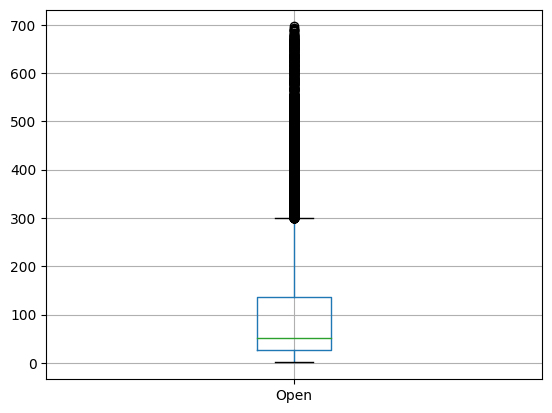

In [10]:
print(df.boxplot(column=['Open']))

AxesSubplot(0.125,0.11;0.775x0.77)


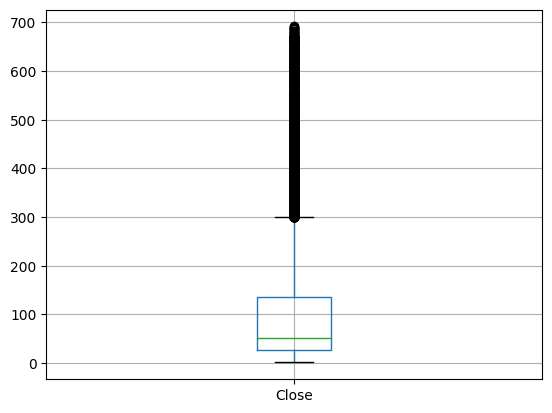

In [11]:
print(df.boxplot(column=['Close']))

AxesSubplot(0.125,0.11;0.775x0.77)


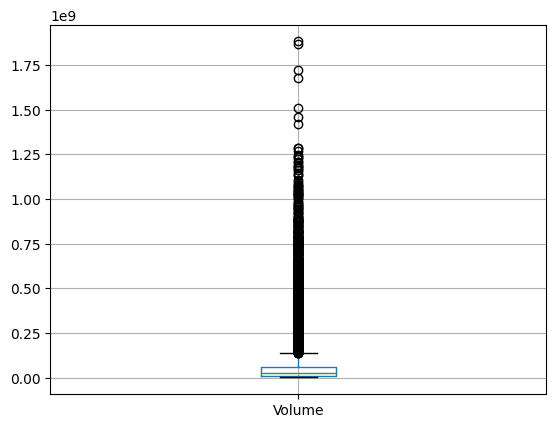

In [12]:
print(df.boxplot(column=['Volume']))

<ul>
    <li><b>Explanation</b>: </li>
    <li><b>Justification</b>: </li>
    <li><b>Advantage</b>: </li>
    <li><b>Disadvantage</b>: </li>
</ul>

<center><u><h4>Check for null values</h4></u></center>

In [13]:
df.isnull().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<ul>
    <li><b>Explanation</b>: </li>
    <li><b>Justification</b>: </li>
    <li><b>Advantage</b>: </li>
    <li><b>Disadvantage</b>: </li>
</ul>

<center><u><h4>Create a single target variable for Stock Closing Price</h4></u></center>

In [14]:
df.isnull().sum()

Date         0
Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<ul>
    <li><b>Explanation</b>: </li>
    <li><b>Justification</b>: </li>
    <li><b>Advantage</b>: </li>
    <li><b>Disadvantage</b>: </li>
</ul>

<center><h4>Tools & Techniques</h4></center>

The tools and techniques used for this analysis are as follows:

<center><h4>Tool and Technique Justification </h4></center>

The justification for the utilizedtools and techniques are as follows:

<center><h4>Tools and Techniques Advantages</h4></center>

The advantages of the utilizedtools and techniques are as follows:

<center><h4>Tools and Techniques Disadvantages</h4></center>

The disadvantages of the utilizedtools and techniques are as follows:

<center><h2>Analysis</h2></center>

<h3>D.  Report on your data-analysis process by describing the analysis technique(s) you used to appropriately analyze the data. Include the calculations you performed and their outputs. Justify how you selected the analysis technique(s) you used, including one advantage and one disadvantage of these technique(s).</h3>

<center><h4>Description of Analysis Techniques</h4></center>

The specific analysis techniques used for this analysis are as follows:

<center><h4>Calculations Performed</h4></center>

The calculations performed for this analysis are as follows:

<center><h4>Analysis Technique Justification</h4></center>

The justification for the utilized analysis technique is as follows:

<center><h4>Analysis Technique Advantages</h4></center>

The advantages of the utilized analysis technique is as follows:

<center><h4><center><h4>Analysis Technique Disdvantages</h4></center></h4></center>

The disadvantages of the utilized analysis technique is as follows:

<center><h2>Data Summary and Implications</h2></center>

<h3>E.  Summarize the implications of your data analysis by discussing the results of your data analysis in the context of the research question, including one limitation of your analysis. Within the context of your research question, recommend a course of action based on your results. Then propose two directions or approaches for future study of the data set.</h3>

<center><h4>Data Analysis Implications</h4></center>

The implications of the performed analysis technique are as follows:

<center><h4>Data Analysis Results</h4></center>

The results of the performed analysis technique are as follows:

<center><h4>Data Analysis Limitations</h4></center>

The limitations of the performed analysis technique are as follows:

<center><h4>Recommended Course of Action</h4></center>

The recommended course of action based upon the completed analysis is as follows:

<center><h4>Future Data Study Directions</h4></center>

<ol>
    <li></li>
    <li></li>
</ol>

<h3>F.  Acknowledge sources, using in-text citations and references, for content that is quoted.</h3>

<ul>
<li>Creative Commons License Deed. Creative Commons - Attribution-NonCommercial-ShareAlike 4.0 International - CC BY-NC-SA 4.0. (n.d.). Retrieved February 23, 2023, fromhttps://creativecommons.org/licenses/by-nc-sa/4.0/ </li>
<li>Gower, E. (2023, January 30). Big Tech Stock prices. Kaggle. Retrieved February 23, 2023, fromhttps://www.kaggle.com/datasets/evangower/big-tech-stock-prices </li>
<li>Time series analysis: Definition, types, techniques, and when it's used. Tableau. (n.d.). Retrieved February 23, 2023, from https://www.tableau.com/learn/articles/time-series-analysis#definition </li>
<li>Li, S. (2018, September 5). An end-to-end project on time series analysis and forecasting with python. Medium. Retrieved February 23, 2023, from https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b </li>
<li>Stephen Allwright. (2022, December 6). What is a good MAPE score? (simply explained). Stephen Allwright. Retrieved February 24, 2023, from https://stephenallwright.com/good-mape-score/ </li>
</ul>